# Final Project

Ok, so today we'll be working with the transactions, product, and hh_demographic tables in the project_data folder.

* First, read in the transactions data.

* Read in the only columns `household_key`, `BASKET_ID`, `DAY`, `PRODUCT_ID`, `QUANTITY`, and `SALES_VALUE`.

* Convert `DAY`, `QUANTITY`, and `PRODUCT_ID` to the smallest appropriate integer types.


In [1]:
import pandas as pd
import numpy as np

In [17]:
transactions = pd.read_csv(
    "/Users/huzaifamalik/Downloads/Python for Data Analytics/Data Analysis with Python & Pandas/Pandas Course Resources/project_data/project_transactions.csv",
    usecols = ["household_key", "BASKET_ID", "DAY", "PRODUCT_ID", "QUANTITY", "SALES_VALUE"],
    dtype = {"DAY": "Int16", "QUANTITY": "Int32", "PRODUCT_ID": "Int32"}
)

In [18]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE
0,1364,26984896261,1,842930,1,2.19
1,1364,26984896261,1,897044,1,2.99
2,1364,26984896261,1,920955,1,3.09
3,1364,26984896261,1,937406,1,2.50
4,1364,26984896261,1,981760,1,0.60


In [19]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   household_key  int64  
 1   BASKET_ID      int64  
 2   DAY            Int16  
 3   PRODUCT_ID     Int32  
 4   QUANTITY       Int32  
 5   SALES_VALUE    float64
dtypes: Int16(1), Int32(2), float64(1), int64(2)
memory usage: 75.7 MB


In [22]:
# Use the following snippet to create a Date Column.

transactions = (
    transactions
    .assign(date = (pd.to_datetime("2016", format='%Y') 
                    + pd.to_timedelta(transactions["DAY"].sub(1).astype(str) + " days"))
           )
    .drop(["DAY"], axis=1)
)

In [23]:
transactions

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
0,1364,26984896261,842930,1,2.19,2016-01-01
1,1364,26984896261,897044,1,2.99,2016-01-01
2,1364,26984896261,920955,1,3.09,2016-01-01
3,1364,26984896261,937406,1,2.50,2016-01-01
4,1364,26984896261,981760,1,0.60,2016-01-01
...,...,...,...,...,...,...
2146306,1598,42305362535,92130,1,0.99,2017-12-11
2146307,1598,42305362535,114102,1,8.89,2017-12-11
2146308,1598,42305362535,133449,1,6.99,2017-12-11
2146309,1598,42305362535,6923644,1,4.50,2017-12-11


## TIME BASED ANALYSIS

* Plot the sum of sales by month. Are sales growing over time?
* Next, plot the same series after filtering down to dates April 2016 and October 2017.
* Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.
* Finally, plot total sales by day of week.

In [ ]:
#Plot the sum of sales by month. Are sales growing over time?

In [255]:
transactions.set_index("date")

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE
date,,,,,
2016-01-01,1364,26984896261,842930,1,2.19
2016-01-01,1364,26984896261,897044,1,2.99
2016-01-01,1364,26984896261,920955,1,3.09
2016-01-01,1364,26984896261,937406,1,2.50
2016-01-01,1364,26984896261,981760,1,0.60
...,...,...,...,...,...
2017-12-11,1598,42305362535,92130,1,0.99
2017-12-11,1598,42305362535,114102,1,8.89
2017-12-11,1598,42305362535,133449,1,6.99


In [261]:
transactions.set_index("date").loc[:,"SALES_VALUE"]

date
2016-01-01    2.19
2016-01-01    2.99
2016-01-01    3.09
2016-01-01    2.50
2016-01-01    0.60
              ... 
2017-12-11    0.99
2017-12-11    8.89
2017-12-11    6.99
2017-12-11    4.50
2017-12-11    6.99
Name: SALES_VALUE, Length: 2146311, dtype: float64

In [265]:
total_sales_by_end_of_each_month = transactions.set_index("date").loc[:,"SALES_VALUE"].resample("ME").sum()

In [266]:
total_sales_by_end_of_each_month

date
2016-01-31     46557.97
2016-02-29     97315.16
2016-03-31    185521.82
2016-04-30    267801.38
2016-05-31    298319.14
2016-06-30    288952.45
2016-07-31    296488.02
2016-08-31    303951.35
2016-09-30    302040.56
2016-10-31    309962.42
2016-11-30    304764.41
2016-12-31    310456.27
2017-01-31    320301.20
2017-02-28    298058.26
2017-03-31    325511.23
2017-04-30    308786.99
2017-05-31    328829.68
2017-06-30    304792.96
2017-07-31    312853.52
2017-08-31    341670.16
2017-09-30    317498.59
2017-10-31    346065.23
2017-11-30    335458.18
2017-12-31    114286.55
Freq: ME, Name: SALES_VALUE, dtype: float64

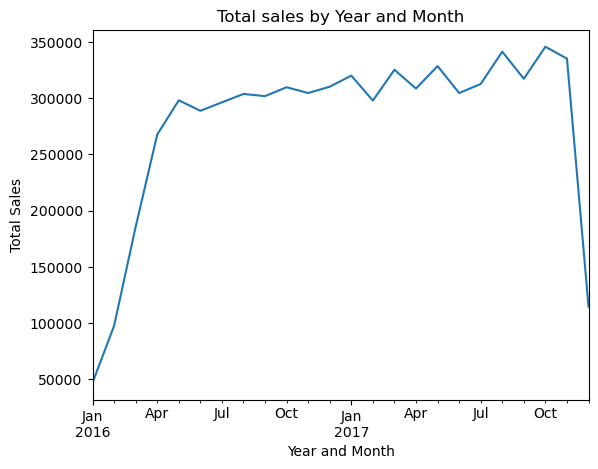

In [270]:
total_sales_by_end_of_each_month.plot(
    title = "Total sales by Year and Month",
    xlabel = "Year and Month",
    ylabel = "Total Sales"
);

In [ ]:
#Next, plot the same series after filtering down to dates April 2016 and October 2017.

In [297]:
transactions_apr_2016_oct_2017 = (
    transactions.query(
        "(date >='2016-04-01') & (date <= '2017-10-31')"
    )
)

In [298]:
transactions_apr_2016_oct_2017

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date
107294,1722,28069002479,938512,5,19.95,2016-04-01
107295,1722,28069002479,941797,6,23.94,2016-04-01
107296,1722,28069002479,1053690,50,78.79,2016-04-01
107297,1722,28069002479,1139786,4,15.96,2016-04-01
107298,1722,28069002479,9419422,6,23.94,2016-04-01
...,...,...,...,...,...,...
2007048,1963,41758455668,13842139,1,1.00,2017-10-31
2007049,1963,41758455668,15926878,1,3.50,2017-10-31
2007050,1526,41758456309,888004,1,3.99,2017-10-31
2007051,1526,41758456309,8015407,2,5.98,2017-10-31


In [299]:
transactions_apr_2016_oct_2017.set_index("date").loc[:,"SALES_VALUE"]

date
2016-04-01    19.95
2016-04-01    23.94
2016-04-01    78.79
2016-04-01    15.96
2016-04-01    23.94
              ...  
2017-10-31     1.00
2017-10-31     3.50
2017-10-31     3.99
2017-10-31     5.98
2017-10-31    35.00
Name: SALES_VALUE, Length: 1894312, dtype: float64

In [303]:
total_sales_apr_2016_oct_2017 = transactions_apr_2016_oct_2017.set_index("date").loc[:,"SALES_VALUE"].resample("ME").sum()

In [304]:
total_sales_apr_2016_oct_2017

date
2016-04-30    267801.38
2016-05-31    298319.14
2016-06-30    288952.45
2016-07-31    296488.02
2016-08-31    303951.35
2016-09-30    302040.56
2016-10-31    309962.42
2016-11-30    304764.41
2016-12-31    310456.27
2017-01-31    320301.20
2017-02-28    298058.26
2017-03-31    325511.23
2017-04-30    308786.99
2017-05-31    328829.68
2017-06-30    304792.96
2017-07-31    312853.52
2017-08-31    341670.16
2017-09-30    317498.59
2017-10-31    346065.23
Freq: ME, Name: SALES_VALUE, dtype: float64

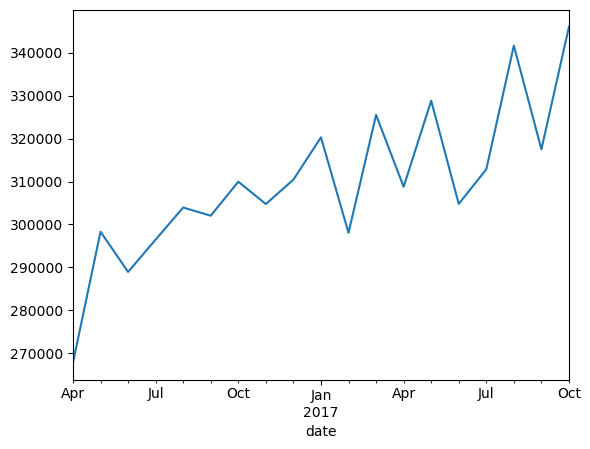

In [305]:
total_sales_apr_2016_oct_2017.plot();

In [ ]:
#Then, plot the sum of monthly sales in 2016 vs the monthly sales 2017.

In [312]:
total_sales_by_year_and_month = transactions.pivot_table(
    index = transactions["date"].dt.month,
    columns = transactions["date"].dt.year,
    values = "SALES_VALUE",
    aggfunc = "sum"
)

In [313]:
total_sales_by_year_and_month

date,2016,2017
date,,
1,46557.97,320301.20
2,97315.16,298058.26
3,185521.82,325511.23
4,267801.38,308786.99
5,298319.14,328829.68
6,288952.45,304792.96
7,296488.02,312853.52
8,303951.35,341670.16
9,302040.56,317498.59


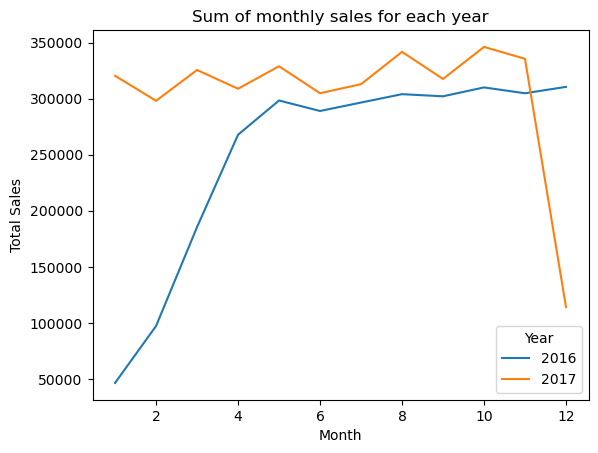

In [314]:
total_sales_by_year_and_month.plot(
    xlabel = "Month", ylabel = "Total Sales", title = "Sum of monthly sales for each year"
).legend(title = "Year");

In [ ]:
#Finally, plot total sales by day of week.

In [84]:
total_sales_day_of_week = transactions.groupby(
    transactions["date"].dt.dayofweek).agg({"SALES_VALUE": "sum"})

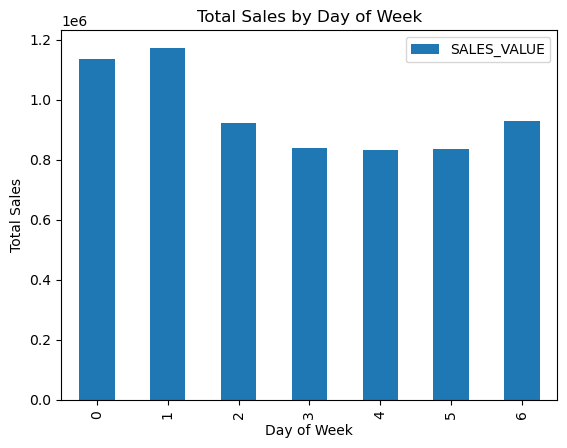

In [89]:
total_sales_day_of_week.plot(
    kind = "bar", xlabel = "Day of Week", ylabel = "Total Sales", title = "Total Sales by Day of Week"
);

# DEMOGRAPHICS

* Read in the `hh_demographic.csv` file, but only the columns `AGE_DESC`, `INCOME_DESC`, `household_key`, and `HH_COMP_DESC`. Convert the appropriate columns to the category dtype.


* Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.


* Once you've done that, join the demographics DataFrame to the aggregated transactions table. Since we're interested in analyzing the demographic data we have, make sure not to include rows from transactions that don't match.


* Plot the sum of sales by age_desc and income_desc (in separate charts).


* Then, create a pivot table of the mean household sales by `AGE_DESC` and `HH_COMP_DESC`. Which of our demographics have the highest average sales?


In [110]:
demographic = pd.read_csv(
    "/Users/huzaifamalik/Downloads/Python for Data Analytics/Data Analysis with Python & Pandas/Pandas Course Resources/project_data/hh_demographic.csv",
    usecols = ["AGE_DESC", "INCOME_DESC", "household_key", "HH_COMP_DESC"],
    dtype = {"household_key":"Int16"}
)

In [111]:
demographic.head()

,AGE_DESC,INCOME_DESC,HH_COMP_DESC,household_key
0,65+,35-49K,2 Adults No Kids,1
1,45-54,50-74K,2 Adults No Kids,7
2,25-34,25-34K,2 Adults Kids,8
3,25-34,75-99K,2 Adults Kids,13
4,45-54,50-74K,Single Female,16


In [112]:
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AGE_DESC       801 non-null    object
 1   INCOME_DESC    801 non-null    object
 2   HH_COMP_DESC   801 non-null    object
 3   household_key  801 non-null    Int16 
dtypes: Int16(1), object(3)
memory usage: 21.2+ KB


In [116]:
demographic["household_key"].unique()

<IntegerArray>
[   1,    7,    8,   13,   16,   17,   18,   19,   20,   22,
 ...
 2479, 2483, 2486, 2488, 2489, 2494, 2496, 2497, 2498, 2499]
Length: 801, dtype: Int16

In [ ]:
#Then group the transactions table by household_id, and calculate the sum of SALES VALUE by household.

In [335]:
household_sales = transactions.groupby("household_key").agg({"SALES_VALUE": "sum"})

In [336]:
household_sales

,SALES_VALUE
household_key,
1,4330.16
2,1954.34
3,2653.21
4,1200.11
5,779.06
...,...
2095,3790.49
2096,1301.65
2097,8823.83


In [ ]:
#Once you've done that, join the demographics DataFrame to the aggregated transactions table. 
#Since we're interested in analyzing demographic data we have, 
#Make sure not to include rows from transactions that don't match.

In [341]:
household_sales_demographic = household_sales.merge(
    demographic,
    how = "inner",
    left_on = "household_key",
    right_on = "household_key"
)

In [342]:
household_sales_demographic

,household_key,SALES_VALUE,AGE_DESC,INCOME_DESC,HH_COMP_DESC
0,1,4330.16,65+,35-49K,2 Adults No Kids
1,7,3400.05,45-54,50-74K,2 Adults No Kids
2,8,5534.97,25-34,25-34K,2 Adults Kids
3,13,13190.92,25-34,75-99K,2 Adults Kids
4,16,1512.02,45-54,50-74K,Single Female
...,...,...,...,...,...
663,2087,7832.74,45-54,100-124K,Unknown
664,2088,4905.71,25-34,35-49K,Single Female
665,2092,2290.54,35-44,Under 15K,1 Adult Kids
666,2094,3055.52,45-54,50-74K,2 Adults No Kids


In [ ]:
#Plot the sum of sales by age_desc and income_desc (in separate charts).

In [343]:

total_sales_age_desc = household_sales_demographic.pivot_table(
    index = "AGE_DESC",
    values = "SALES_VALUE",
    aggfunc = "sum"
)

In [344]:
total_sales_age_desc

,SALES_VALUE
AGE_DESC,
19-24,182991.03
25-34,635955.55
35-44,986670.19
45-54,1328371.19
55-64,258446.21
65+,260456.19


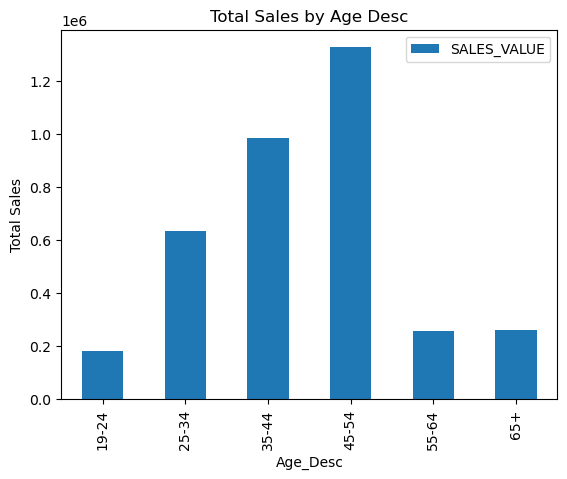

In [345]:
total_sales_age_desc.plot(
    kind = "bar",
    xlabel = "Age_Desc",
    ylabel = "Total Sales",
    title = "Total Sales by Age Desc"

);

In [346]:
total_sales_income_desc = household_sales_demographic.groupby("INCOME_DESC").agg({"SALES_VALUE": "sum"})

In [347]:
total_sales_income_desc

,SALES_VALUE
INCOME_DESC,
100-124K,176701.11
125-149K,243900.83
15-24K,274757.94
150-174K,199350.78
175-199K,50970.79
200-249K,24232.17
25-34K,297183.42
250K+,51715.16
35-49K,706011.17


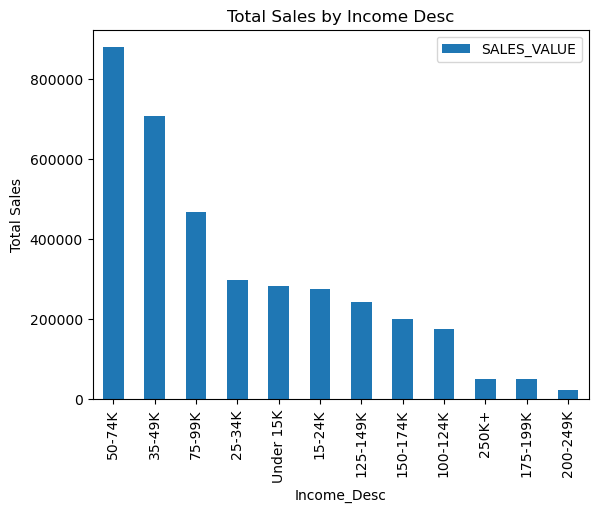

In [348]:
total_sales_income_desc.sort_values("SALES_VALUE", ascending = False).plot(
    kind = "bar",
    xlabel = "Income_Desc",
    ylabel = "Total Sales",
    title = "Total Sales by Income Desc"
);

In [ ]:
#Create pivot table of mean household sales by AGE_DESC and HH_COMP_DESC. 
#Which of our demographics have the highest average sales?

In [349]:
avg_sales_age_desc_and_comp_desc = household_sales_demographic.pivot_table(
    index = "AGE_DESC",
    columns = "HH_COMP_DESC",
    values = "SALES_VALUE",
    aggfunc = "mean"
)

In [350]:
avg_sales_age_desc_and_comp_desc

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown
AGE_DESC,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000


In [351]:
from IPython.display import display

styled = avg_sales_age_desc_and_comp_desc.style.background_gradient(cmap="RdYlGn", axis=None)
display(styled)

HH_COMP_DESC,1 Adult Kids,2 Adults Kids,2 Adults No Kids,Single Female,Single Male,Unknown
AGE_DESC,,,,,,
19-24,7268.796667,5428.945000,4020.800000,4576.095556,3216.835000,4911.275000
25-34,5512.196875,5753.973514,5638.515833,4807.440588,4909.522381,7356.270000
35-44,6297.737778,6691.772264,6260.412444,6015.192069,4844.192000,4227.691818
45-54,6632.569167,6610.484490,5839.527027,4549.365405,4636.637083,4843.995682
55-64,3064.870000,4695.655000,5752.413684,4816.148462,3922.546250,7973.750000
65+,4040.810000,5536.866667,4614.108571,4059.699412,3871.556000,2879.290000


In [356]:
print(f"Based on heatmap, demographic with highest avg sales is '55-64' age group with 'Unknown' household composition")

Based on heatmap, demographic with highest avg sales is '55-64' age group with 'Unknown' household composition


In [352]:
avg_sales_age_desc_and_comp_desc.values

array([[7268.79666667, 5428.945     , 4020.8       , 4576.09555556,
        3216.835     , 4911.275     ],
       [5512.196875  , 5753.97351351, 5638.51583333, 4807.44058824,
        4909.52238095, 7356.27      ],
       [6297.73777778, 6691.77226415, 6260.41244444, 6015.19206897,
        4844.192     , 4227.69181818],
       [6632.56916667, 6610.4844898 , 5839.52702703, 4549.36540541,
        4636.63708333, 4843.99568182],
       [3064.87      , 4695.655     , 5752.41368421, 4816.14846154,
        3922.54625   , 7973.75      ],
       [4040.81      , 5536.86666667, 4614.10857143, 4059.69941176,
        3871.556     , 2879.29      ]])

In [353]:
print(f"Highest average sales: {avg_sales_age_desc_and_comp_desc.values.max()}")
print(f"Demographic is {avg_sales_age_desc_and_comp_desc.stack().idxmax()}")

Highest average sales: 7973.75
Demographic is ('55-64', 'Unknown')


# PRODUCT DEMOGRAPHICS

* Read in the product csv file.

* Only read in product_id and department from product (consider converting columns).

* Join the product DataFrame to transactions and demographics tables, performing an inner join when joining both tables.

* Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. Which category does our youngest demographic perform well in?



In [199]:
product = pd.read_csv(
    "/Users/huzaifamalik/Downloads/Python for Data Analytics/Data Analysis with Python & Pandas/Pandas Course Resources/project_data/product.csv",
    usecols = ["PRODUCT_ID", "DEPARTMENT"],
    dtype = {"PRODUCT_ID": "Int32"}
)

In [200]:
product

,PRODUCT_ID,DEPARTMENT
0,25671,GROCERY
1,26081,MISC. TRANS.
2,26093,PASTRY
3,26190,GROCERY
4,26355,GROCERY
...,...,...
92348,18293142,DRUG GM
92349,18293439,DRUG GM
92350,18293696,DRUG GM
92351,18294080,DRUG GM


In [ ]:
#Join the product DataFrame to transactions and demographics tables, 
#performing an inner join when joining both tables.

In [210]:
all_joined_tables = (
    transactions.merge(
    product,
    how = "inner",
    left_on = "PRODUCT_ID",
    right_on = "PRODUCT_ID"
    )
    .merge(
        demographic,
        how = "inner",
        left_on = "household_key",
        right_on = "household_key"
    )
)

In [211]:
all_joined_tables

,household_key,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,date,DEPARTMENT,AGE_DESC,INCOME_DESC,HH_COMP_DESC
0,1364,26984896261,842930,1,2.19,2016-01-01,GROCERY,65+,100-124K,Single Female
1,1364,26984896261,897044,1,2.99,2016-01-01,GROCERY,65+,100-124K,Single Female
2,1364,26984896261,920955,1,3.09,2016-01-01,MEAT,65+,100-124K,Single Female
3,1364,26984896261,937406,1,2.50,2016-01-01,MEAT-PCKGD,65+,100-124K,Single Female
4,1364,26984896261,981760,1,0.60,2016-01-01,GROCERY,65+,100-124K,Single Female
...,...,...,...,...,...,...,...,...,...,...
1161570,1369,42302712189,844054,1,1.29,2017-12-11,GROCERY,25-34,Under 15K,Single Male
1161571,1369,42302712189,844759,1,1.69,2017-12-11,GROCERY,25-34,Under 15K,Single Male
1161572,1369,42302712189,959737,2,25.98,2017-12-11,GROCERY,25-34,Under 15K,Single Male
1161573,1369,42302712189,1135096,1,1.99,2017-12-11,GROCERY,25-34,Under 15K,Single Male


In [ ]:
#Finally, pivot the fully joined dataframe by AGE_DESC and DEPARTMENT, calculating the sum of sales. 
#Which category does our youngest demographic perform well in?

In [413]:
total_sales_department_age = all_joined_tables.pivot_table(
    index = "DEPARTMENT",
    columns = "AGE_DESC",
    values = "SALES_VALUE",
    aggfunc = "sum"
)

In [414]:
total_sales_department_age.head()

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
,0.00,0.00,0.00,0.00,0.00,0.00
AUTOMOTIVE,11.64,21.25,72.58,55.92,NaN,16.37
CHEF SHOPPE,81.30,134.16,348.53,418.24,80.86,149.24
CNTRL/STORE SUP,2.00,0.00,1.00,9.95,2.00,0.10
COSMETICS,698.63,2273.03,4362.02,5187.57,986.26,600.90


In [415]:
total_sales_department_age.index

Index([' ', 'AUTOMOTIVE', 'CHEF SHOPPE', 'CNTRL/STORE SUP', 'COSMETICS',
       'COUP/STR & MFG', 'DAIRY DELI', 'DELI', 'DELI/SNACK BAR', 'DRUG GM',
       'FLORAL', 'FROZEN GROCERY', 'GARDEN CENTER', 'GM MERCH EXP',
       'GRO BAKERY', 'GROCERY', 'KIOSK-GAS', 'MEAT', 'MEAT-PCKGD', 'MEAT-WHSE',
       'MISC SALES TRAN', 'MISC. TRANS.', 'NUTRITION', 'PASTRY',
       'PHARMACY SUPPLY', 'PHOTO', 'POSTAL CENTER', 'PROD-WHS SALES',
       'PRODUCE', 'RESTAURANT', 'RX', 'SALAD BAR', 'SEAFOOD', 'SEAFOOD-PCKGD',
       'SPIRITS', 'TOYS', 'TRAVEL & LEISUR', 'VIDEO'],
      dtype='object', name='DEPARTMENT')

In [416]:
total_sales_department_age = total_sales_department_age.loc[total_sales_department_age.index !=" "]

In [430]:
from IPython.display import display

styled_pivot = total_sales_department_age.style.background_gradient(cmap="RdYlGn", axis=1)

display(styled_pivot)

AGE_DESC,19-24,25-34,35-44,45-54,55-64,65+
DEPARTMENT,,,,,,
AUTOMOTIVE,11.640000,21.250000,72.580000,55.920000,nan,16.370000
CHEF SHOPPE,81.300000,134.160000,348.530000,418.240000,80.860000,149.240000
CNTRL/STORE SUP,2.000000,0.000000,1.000000,9.950000,2.000000,0.100000
COSMETICS,698.630000,2273.030000,4362.020000,5187.570000,986.260000,600.900000
COUP/STR & MFG,7.490000,48.420000,121.200000,154.550000,40.680000,20.490000
DAIRY DELI,3.800000,3.850000,7.390000,16.750000,3.140000,1.940000
DELI,4043.300000,18181.940000,34577.290000,44334.220000,9850.540000,10462.330000
DELI/SNACK BAR,nan,nan,6.980000,1.560000,nan,3.310000
DRUG GM,25297.430000,85298.050000,126480.340000,177007.130000,29220.930000,32759.760000


In [431]:
youngest_demographic_sales_by_department = total_sales_department_age.loc[:,"19-24"]

In [432]:
youngest_demographic_sales_by_department

DEPARTMENT
AUTOMOTIVE            11.64
CHEF SHOPPE           81.30
CNTRL/STORE SUP        2.00
COSMETICS            698.63
COUP/STR & MFG         7.49
DAIRY DELI             3.80
DELI                4043.30
DELI/SNACK BAR          NaN
DRUG GM            25297.43
FLORAL               776.99
FROZEN GROCERY         1.64
GARDEN CENTER         41.98
GM MERCH EXP            NaN
GRO BAKERY              NaN
GROCERY            99008.27
KIOSK-GAS           8465.18
MEAT               11957.34
MEAT-PCKGD         10453.13
MEAT-WHSE               NaN
MISC SALES TRAN     2031.73
MISC. TRANS.          73.52
NUTRITION           1146.40
PASTRY              2386.73
PHARMACY SUPPLY         NaN
PHOTO                  4.98
POSTAL CENTER           NaN
PROD-WHS SALES          NaN
PRODUCE            10170.59
RESTAURANT             1.39
RX                      NaN
SALAD BAR           1330.15
SEAFOOD              461.18
SEAFOOD-PCKGD       1500.27
SPIRITS             2983.75
TOYS                    NaN
TRAVEL & 

In [433]:
max_sale_value = youngest_demographic_sales_by_department.max()

In [434]:
x = youngest_demographic_sales_by_department.where(youngest_demographic_sales_by_department == max_sale_value)

In [435]:
x

DEPARTMENT
AUTOMOTIVE              NaN
CHEF SHOPPE             NaN
CNTRL/STORE SUP         NaN
COSMETICS               NaN
COUP/STR & MFG          NaN
DAIRY DELI              NaN
DELI                    NaN
DELI/SNACK BAR          NaN
DRUG GM                 NaN
FLORAL                  NaN
FROZEN GROCERY          NaN
GARDEN CENTER           NaN
GM MERCH EXP            NaN
GRO BAKERY              NaN
GROCERY            99008.27
KIOSK-GAS               NaN
MEAT                    NaN
MEAT-PCKGD              NaN
MEAT-WHSE               NaN
MISC SALES TRAN         NaN
MISC. TRANS.            NaN
NUTRITION               NaN
PASTRY                  NaN
PHARMACY SUPPLY         NaN
PHOTO                   NaN
POSTAL CENTER           NaN
PROD-WHS SALES          NaN
PRODUCE                 NaN
RESTAURANT              NaN
RX                      NaN
SALAD BAR               NaN
SEAFOOD                 NaN
SEAFOOD-PCKGD           NaN
SPIRITS                 NaN
TOYS                    NaN
TRAVEL & 

In [436]:
y = x.loc[x.notna()]

In [437]:
y

DEPARTMENT
GROCERY    99008.27
Name: 19-24, dtype: float64

In [438]:
y.reset_index()

,DEPARTMENT,19-24
0,GROCERY,99008.27


In [439]:
category = y.reset_index().iloc[0,0]
sales_value = y.reset_index().iloc[0,1]

In [440]:
print(
    f"Category the youngest demographic '19-24' performs the best is {category}. Sales value is {sales_value}"
)

Category the youngest demographic '19-24' performs the best is GROCERY. Sales value is 99008.27


# EXPORT

Finally, export your pivot table to an excel file. Make sure to provide a sheet name.

In [442]:
styled_pivot.to_excel(
    "/Users/huzaifamalik/Downloads/Python for Data Analytics/Data Analysis with Python & Pandas/Pandas Course Resources/project_data/pivot_table_sales.xlsx",
    sheet_name = "Sales_Department_and_Age"
)